In [1]:
#hierarchical modeling and k mode 
#used the most granular information from v3
#used the top 150 common features from v3 
#also limited sample size 

In [20]:
import pandas as pd
import numpy as np
import scipy as sp


from sklearn import preprocessing

from sklearn import metrics#import editdistance as edist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics
from sklearn import cluster

from sklearn.ensemble import IsolationForest

from scipy import cluster
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#read in v3 data which is a dictionary of aa and what do they stand for
df =pd.read_csv('~/Documents/persona_project_cardiology/clustering/persona1_processed.csv')

In [8]:
#read in name for each segment 
names=pd.read_csv('~/Documents/persona_project_cardiology/clustering/names.csv')

In [9]:
df1=df.iloc[:,8:]
#eliminate the first 8 columns 

In [10]:
#to make it run faster, only look at the first 150 features, and the most reacent 20000 rows 
df2=df1.iloc[:20000,:150]

In [11]:
#detecting outliers in outcomes
#isf=IsolationForest()
#isf.fit(df2)
#t=isf.predict(df2)
#len(np.where(t==-1)[0])
#df3=df2[t==1]

df3=df2
df3.shape

(20000, 150)

In [12]:
#hierarchical clustering with custome distance/dissimilarity metric
#https://gist.github.com/codehacken/8b9316e025beeabb082dda4d0654a6fa

In [13]:
#change data type from int to boolean to feed into pairwise distance
for i in range(df3.shape[1]): 
    df3.iloc[:,i]=df3.iloc[:,i].astype('bool')

In [14]:
# Calculate pairwise distances with the dice dissimilarity.
m = pairwise_distances(df3, df3, metric='dice') 
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
#print(m)

[[0.         0.9047619  0.79545455 ... 0.94736842 0.58441558 0.80821918]
 [0.9047619  0.         0.96428571 ... 0.66666667 0.95555556 0.95121951]
 [0.79545455 0.96428571 0.         ... 0.96153846 0.84615385 0.51724138]
 ...
 [0.94736842 0.66666667 0.96153846 ... 0.         0.95121951 1.        ]
 [0.58441558 0.95555556 0.84615385 ... 0.95121951 0.         0.89473684]
 [0.80821918 0.95121951 0.51724138 ... 1.         0.89473684 0.        ]]


In [15]:
#remove missing. the missings here are false false values and creates negative inf val in dissimilarity matrix 
m_df=pd.DataFrame(m)
keep=m_df.index[pd.isnull(m_df).any(axis=0)==False]
m_df1=m_df.iloc[keep,keep]
m_df1.shape
m2=m_df1.values

In [16]:
m_df1.shape

(19199, 19199)

In [17]:
#also delete these rows in original data with label in order to match with predictions
df4=df2.iloc[keep,]

In [13]:
# Perform agglomerative clustering.
# The affinity is precomputed (since the distance are precalculated).
# Use an 'average' linkage. Use any other apart from  'ward'.
agg = AgglomerativeClustering(n_clusters=6, affinity='precomputed',
                              linkage='average')

# Use the distance matrix directly.
u = agg.fit_predict(m2)

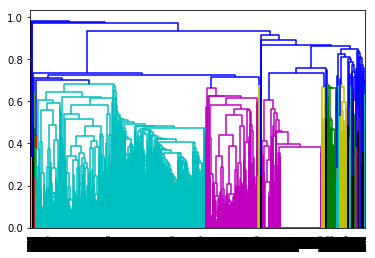

In [14]:
#dendrogram
X = sp.spatial.distance.squareform(m2)
Z = cluster.hierarchy.linkage(X, 'average')

plt.figure()
dn = sp.cluster.hierarchy.dendrogram(Z)

In [15]:
metrics.silhouette_score(m2, u, metric="precomputed")
#https://www.stat.berkeley.edu/~spector/s133/Clus.html
#the cluster is weak and could potentially be artificial 

0.2934444865039251

In [16]:
#tabulate frequency for each prediction result 
unique_elements, counts_elements = np.unique(u, return_counts=True)

In [17]:
counts_elements

array([ 5959,   106, 13100,     5,    27,     2])

In [18]:
len(u)

19199

In [19]:
#associate prediction with original data 
df4['label']=u
# only look at the second cluster
df4_2=df4[df4.label==2] 
df4_2.shape

/Users/aiyizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
# find the percentage of true for each feature for label 2
#label 2 seems to be the largest one so it could potentially be the likly cardiology patient 
hm2=[]
for i in range(df4_2.iloc[:,:150].shape[1]):
    hm2.append(round(np.unique(df4_2.iloc[:,:150].iloc[:,i], return_counts=True)[1][1]/df4_2.iloc[:,:150].shape[0],2))

In [32]:
hm2=pd.DataFrame(list(map(list, zip(hm2, names.cat))))
hm2=hm2.sort_values(by=[0], ascending=False)

In [34]:
hm2.to_csv("hm2Aug24.csv")
#no children
#speaks english 
#homeowner, high disposable income 
#generation X
#voted
#apple app download

#democrat
#mid priced, and mid disposable income
#live concert, dine out but not fastfood
#babyboomer 
#exercise 


#apparel website, amazon
#uses phone, and does banking

In [1]:
#plot feature importance of label 2
#sns.set(style="whitegrid")
#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(20, 8.27)

#ax = sns.barplot(x=1, y=0, data=hm2[1:70],color="grey", ax=ax)
#ax.set_title('Percent Consumer per Feature for Likely Cardiolovescular Patients')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [ ]:
#kmode
#https://pypi.org/project/kmodes/

In [3]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df3)

# Print the cluster centroids
#print(km.cluster_centroids_)

In [94]:
unique_elements, counts_elements = np.unique(clusters, return_counts=True)

In [95]:
counts_elements

array([3110, 2141, 7913, 2256, 1316, 3264])

In [96]:
df3['label']=clusters

In [112]:
# only look at the second cluster
df3_2=df3[df3.label==5] 
df3_2.shape

(3264, 151)

In [113]:
# find the percentage of true for each feature for label 2
testk=[1]
for i in range(df3_2.iloc[:,:150].shape[1]):
    testk.append(round(np.unique(df3_2.iloc[:,:150].iloc[:,i], return_counts=True)[1][0]/df3_2.iloc[:,:150].shape[0],2))
test_outk[:] = [1 - x  for x in test_outk]
test_outk=pd.DataFrame(list(map(list, zip(testk, names.cat))))
test_outk=test_outk.sort_values(by=[0], ascending=False)    

In [114]:
test_outk.to_csv('kmode2Aug24.csv')

In [ ]:
#dbscan 

In [22]:
# Compute DBSCAN use precomputed dissilimarity matrix 
db = DBSCAN(eps=0.3, min_samples=10,metric='precomputed').fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [23]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [25]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(m2, labels, metric="precomputed"))
#lots of overlapping clusters

Estimated number of clusters: 13
Silhouette Coefficient: 0.170


In [30]:
#tabulate frequency for each prediction result 
unique_elements, counts_elements = np.unique(labels, return_counts=True)

In [36]:
counts_elements

array([  329,  3040, 13152,  2355,    94,    99,    26,    18,    15,
          16,    14,    18,    10,    13])

In [48]:
#associate prediction with original data 
df5=df4
df5['label']=labels
# only look at the second cluster
df5_2=df5[df5.label==1] 
df5_2.shape

/Users/aiyizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(13152, 151)

In [49]:
# find the percentage of true for each feature for label 2
#label 2 seems to be the largest one so it could potentially be the likly cardiology patient 
db=[]
for i in range(df5_2.iloc[:,:150].shape[1]):
    db.append(round(np.unique(df5_2.iloc[:,:150].iloc[:,i], return_counts=True)[1][1]/df5_2.iloc[:,:150].shape[0],2))

In [41]:
db=pd.DataFrame(list(map(list, zip(db, names.cat))))
db=db.sort_values(by=[0], ascending=False)

In [43]:
db.to_csv("~/Documents/persona_project_cardiology/clustering/dbAug27.csv")
#very similar to hierarchical modeling

#more than 40%: 
#no kids at home, single family, homeowner, residential building
#english
#high buying power able to afford premium goods
#generation X 
#voted 
#apple app download
#direct mail respondent 
#works out

#30-40%: 
#babyboomer 
#don't keep a diet (dine out but not fastfood), live performance
#average disposible income 
#democrat
#apparel website 

#other
#have cellphone service and banking service 